## Heart Disease Prediction

Dataset Information :
Dataset - https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
- This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

Attribute Information:

1. age (in years)
2. sex - (1 = male; 0 = female)
3. cp - chest pain type (4 values)  
        0 - typical angina , 
        1 - atypical angina , 
        2 - non-anginal pain , 
        3 - asymptomatic
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl6.
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg - resting electrocardiographic results (values 0,1,2)
         0 - normal , 
         1 - having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) , 
         2 - showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target (Heart Disease) : 1 - yes ,0 - no

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Collection and Preprocessing

In [5]:
# import dataset
df=pd.read_csv('E:/ML projects/HeartDiseasePred/Dataset/heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.shape

(1025, 14)

In [11]:
#checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df['target'].value_counts() # 1 - Defective Heart , 0 - Healthy Heart

target
1    526
0    499
Name: count, dtype: int64

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
#Disease percentage and No DIsease percentage
disease_df=pd.DataFrame(df['target'].value_counts()/len(df['target'])*100).rename(index={1:'Disease', 0:'No Disease'})
disease_df.columns=['Percentage']
disease_df

,Percentage
target,
Disease,51.317073
No Disease,48.682927


### Exploratory Data Analysis

([<matplotlib.axis.XTick at 0x20975b5e5d0>,
 [Text(0, 0, 'No Disease'), Text(1, 0, 'Disease')])

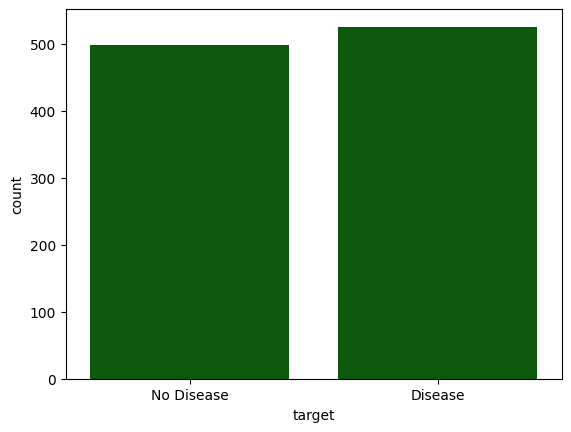

In [15]:
# count how many have heart disease and how many are healthy
sns.countplot(x='target',data=df,color='darkgreen')
plt.xticks([0,1],['No Disease','Disease'])

<Axes: xlabel='age', ylabel='target'>

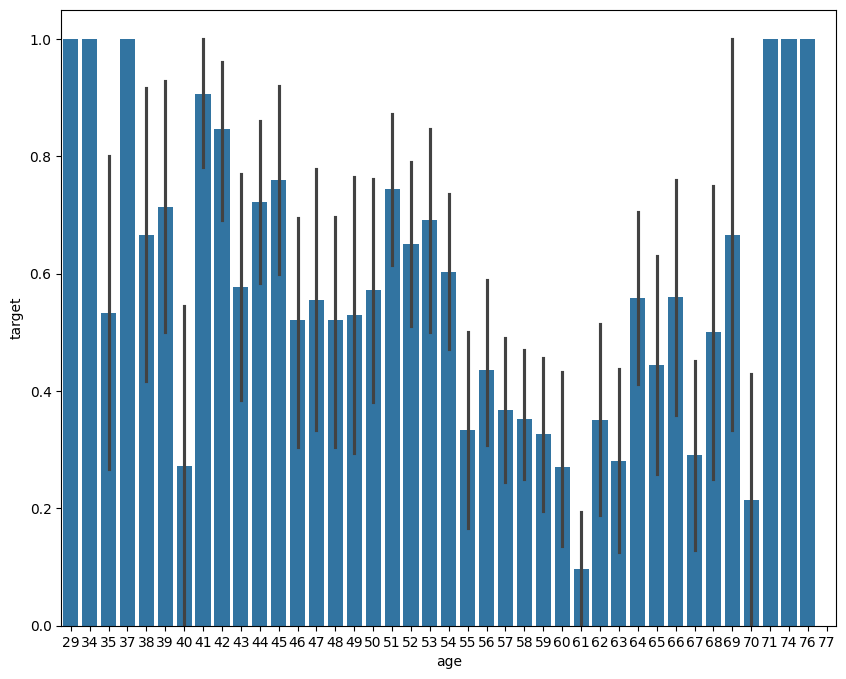

In [16]:
#which age people has more heart diseases
plt.figure(figsize=(10,8))
sns.barplot(x='age',y='target',data=df)

<Axes: xlabel='cp', ylabel='count'>

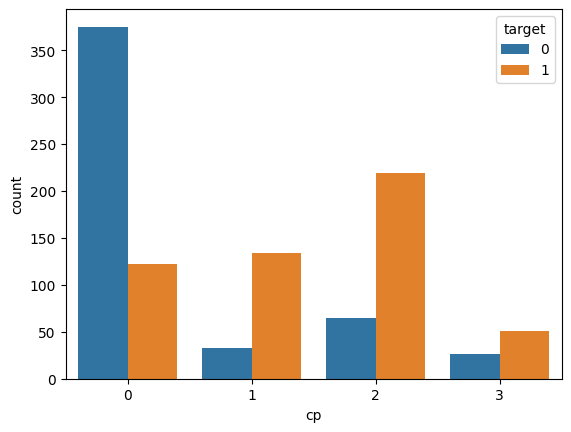

In [17]:
#knowing which chest pain type has more heart diseases
sns.countplot(x='cp',hue='target',data=df)

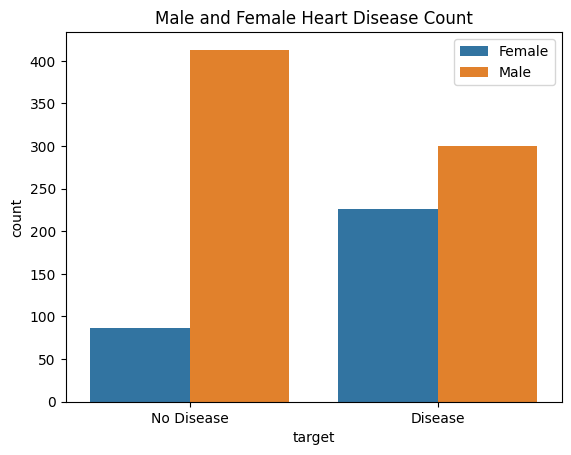

In [18]:
# checking how many in males and females have heart disease
sns.countplot(x=df['target'],hue=df['sex'])
plt.title('Male and Female Heart Disease Count')
plt.xticks([0,1],['No Disease','Disease'])
plt.legend(labels=['Female','Male'])
plt.show()

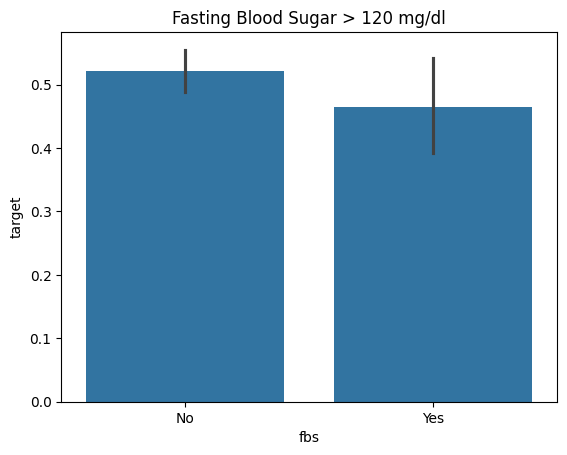

In [19]:
#target for fbs 
sns.barplot(x=df['fbs'],y=df['target'])
plt.title('Fasting Blood Sugar > 120 mg/dl')
plt.xticks([0,1],['No','Yes'])
plt.show()

<Axes: >

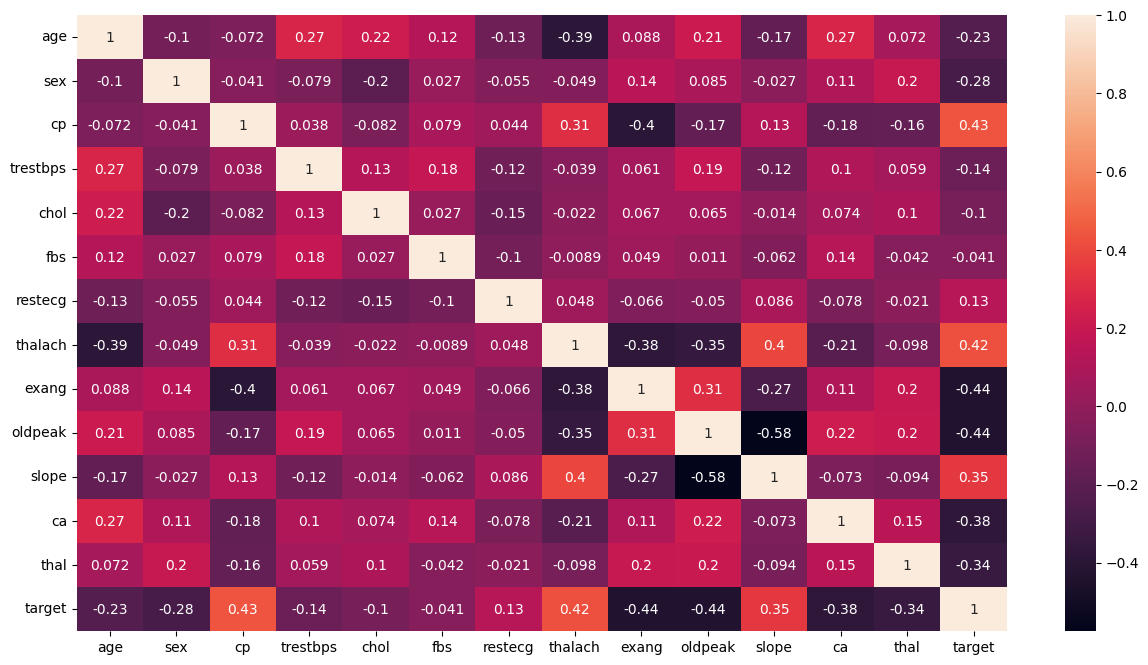

In [20]:
#Corrolation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [21]:
#independent and dependent variables
x = df.drop(columns=['target'])
y = df['target']

### Splitting data for Train and Test

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((717, 13), (308, 13), (717,), (308,))

### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [25]:
x_train_scaled

array([[ 0.51227152,  0.64358464,  0.02931827, ...,  0.97708096,
        -0.72837545, -0.53812812],
       [ 0.40223597,  0.64358464, -0.92619093, ..., -0.65214474,
         2.10991368,  1.10373511],
       [-1.1382618 , -1.55379719,  0.98482748, ..., -0.65214474,
         0.21772092, -0.53812812],
       ...,
       [-0.36801292,  0.64358464, -0.92619093, ...,  0.97708096,
        -0.72837545,  1.10373511],
       [-1.24829735,  0.64358464, -0.92619093, ...,  0.97708096,
        -0.72837545,  1.10373511],
       [-0.25797736,  0.64358464, -0.92619093, ...,  0.97708096,
         0.21772092, -0.53812812]])

Text(0.5, 1.0, 'x_train after scaling')

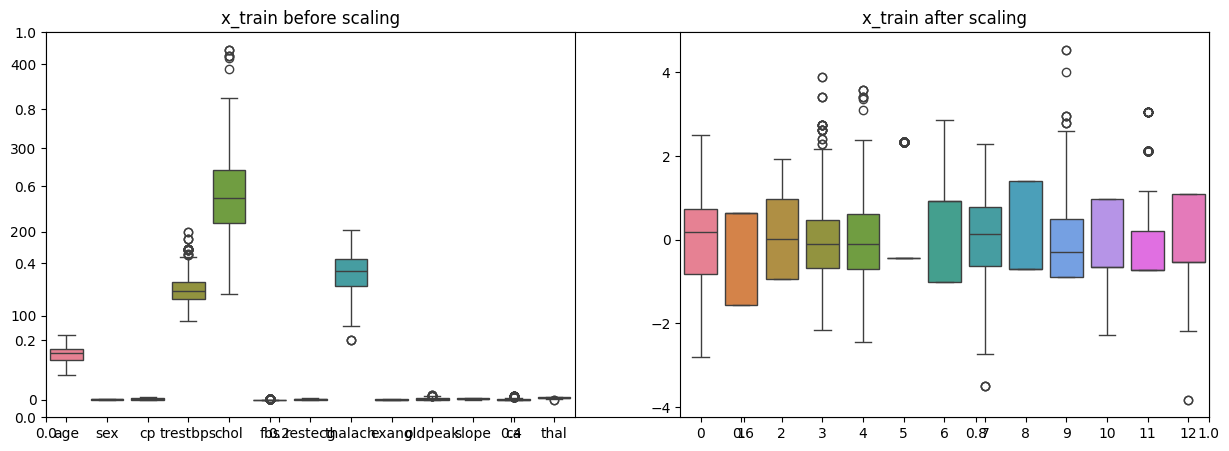

In [26]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("x_train after scaling")

### Model Training

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
logreg=LogisticRegression()

In [28]:
logreg.fit(x_train_scaled,y_train)

LogisticRegression()

In [29]:
y_pred=logreg.predict(x_test_scaled)


In [30]:
accuracy_score(y_test,y_pred)


0.8051948051948052

In [31]:
from sklearn.linear_model import LogisticRegressionCV
reg=LogisticRegressionCV()
reg.fit(x_train_scaled,y_train)
y_pred=reg.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))

0.8116883116883117


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred=rf.predict(x_test_scaled)
accuracy_score(y_test,y_pred)

0.9805194805194806

In [36]:
rf

RandomForestClassifier()

In [33]:
scaler

StandardScaler()

In [37]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rf,open('rf.pkl','wb'))